In [1]:
import numpy as np

In [2]:
# 实现我们的TP
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

In [3]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

In [4]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

In [38]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

In [39]:
def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

使用鸢尾花数据集和knn算法来实现一下

In [29]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

X = iris.data[:, :2]
Y = iris.target

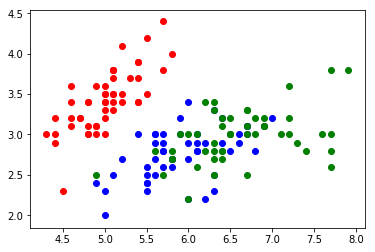

In [28]:
plt.scatter(X[Y==0, 0], X[Y==0, 1], color='r')
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='b')
plt.scatter(X[Y==2, 0], X[Y==2, 1], color='g')

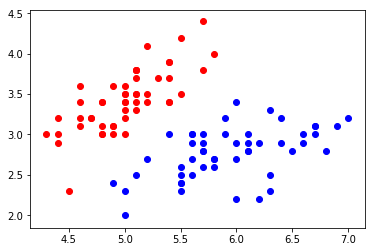

In [31]:
# 我们选取两个来做二分类的为题就好了
iris_x = X[Y<2]
iris_y = Y[Y<2]
plt.scatter(iris_x[iris_y==0, 0], iris_x[iris_y==0, 1], color='r')
plt.scatter(iris_x[iris_y==1, 0], iris_x[iris_y==1, 1], color='b')

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [35]:
# 使用留一法处理数据
def train_test_split(x, y):
    shuffle_indexs = np.random.permutation(len(x))
    # 看我们要留几成当作测试数据集
    test_radio = 0.3
    # 求出test的个数
    test_size = int(len(x)*test_radio)

    # 比如说我现在0-test_size当作test的数据 test_size-最后当成train数据
    test_indexs = shuffle_indexs[:test_size]
    train_indexs = shuffle_indexs[test_size:]
    # 使用fance indexing 进行取值
    train_x = x[train_indexs]
    train_y = y[train_indexs]

    test_x = x[test_indexs]
    test_y = y[test_indexs]
    return train_x, test_x, train_y, test_y

In [37]:
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y)

In [40]:
knn_clf.fit(train_x, train_y)
knn_clf.score(test_x, test_y)  # 实现我们的预测是100%

1.0

In [41]:
y_predict = knn_clf.predict(test_x)

In [42]:
confusion_matrix(test_y, y_predict)

array([[19,  0],
       [ 0, 11]])